In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def perform_prediction(model, x_train, y_train, x_test, y_test, method, print_coefficients=False):
    model.fit(x_train, y_train)
    if print_coefficients:
        print("Coefficients: \n", model.coef_)
        _ = [print(k, v) for k, v in zip(x_train.columns, model.coef_[0])]
        print("Intercept: \n", model.intercept_)

    y_pred = model.predict(x_test)

    score = accuracy_score(y_test, y_pred)
    print(f"Score: {score}")

    ticks = ['Выжил', 'Не выжил']
    ax = plt.axes()
    sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=ticks, yticklabels=ticks, annot=True)
    ax.set_title(method)
    plt.show()

In [152]:
training_set = pd.read_csv('titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
training_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


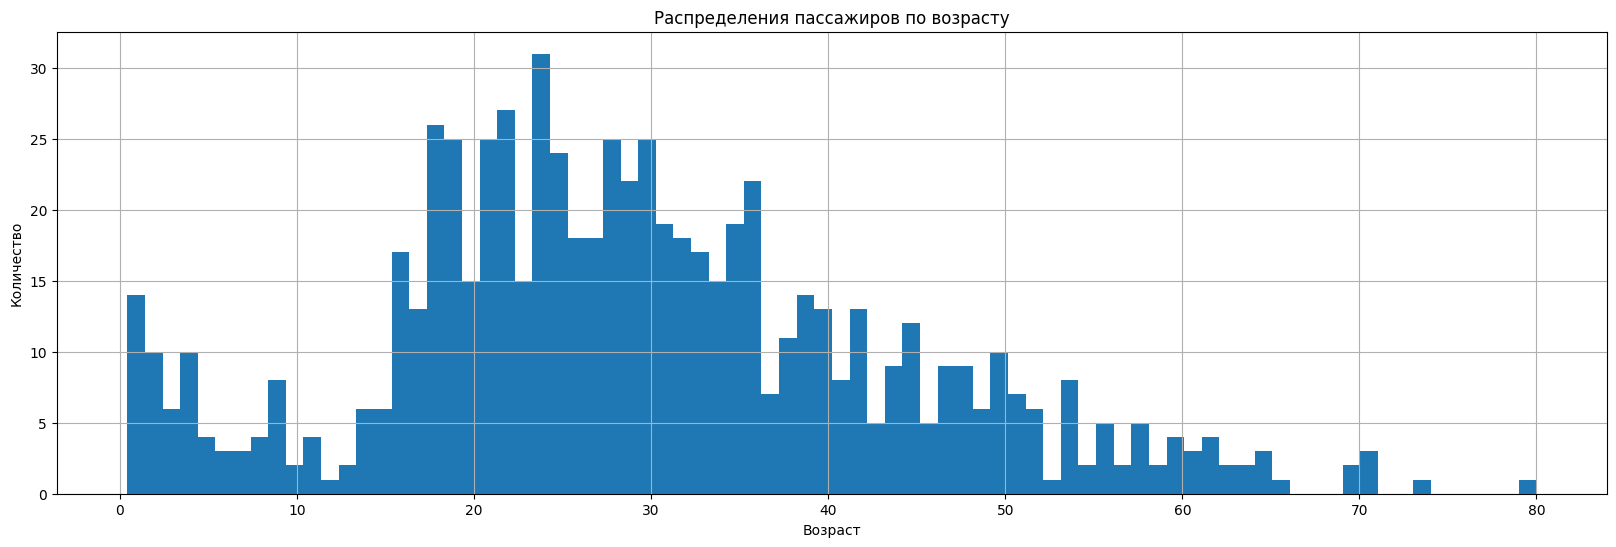

In [155]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

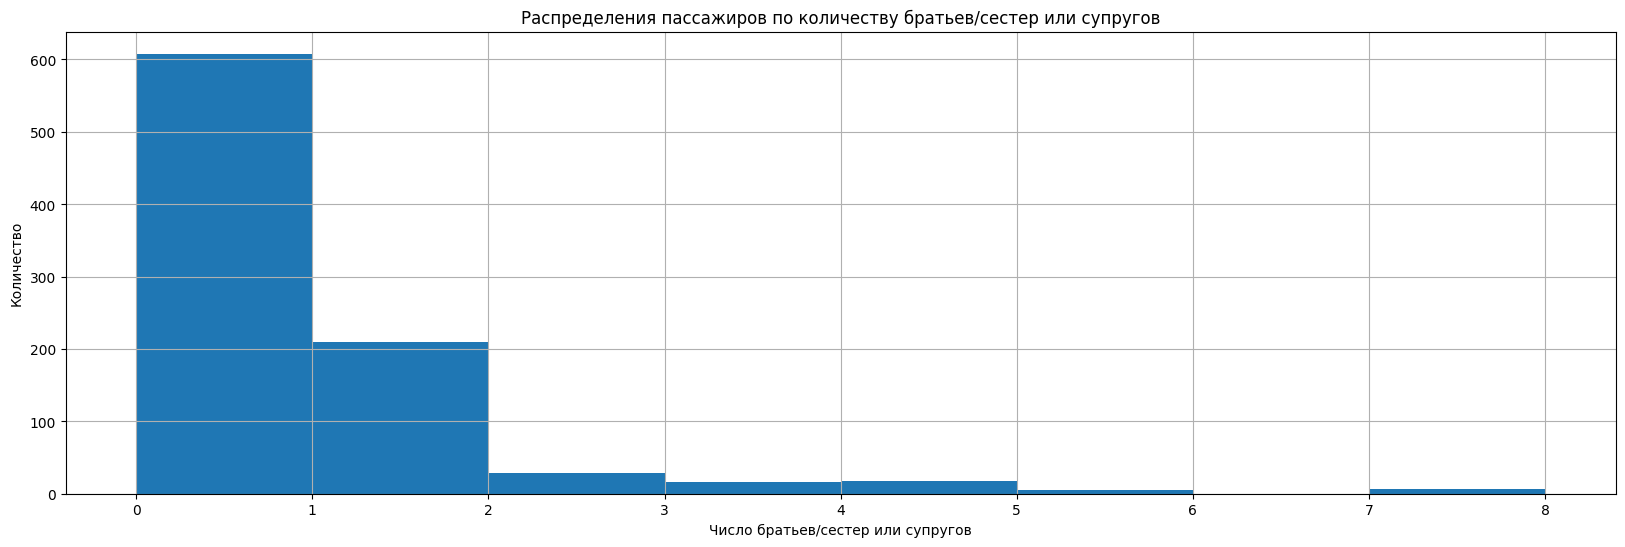

In [156]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

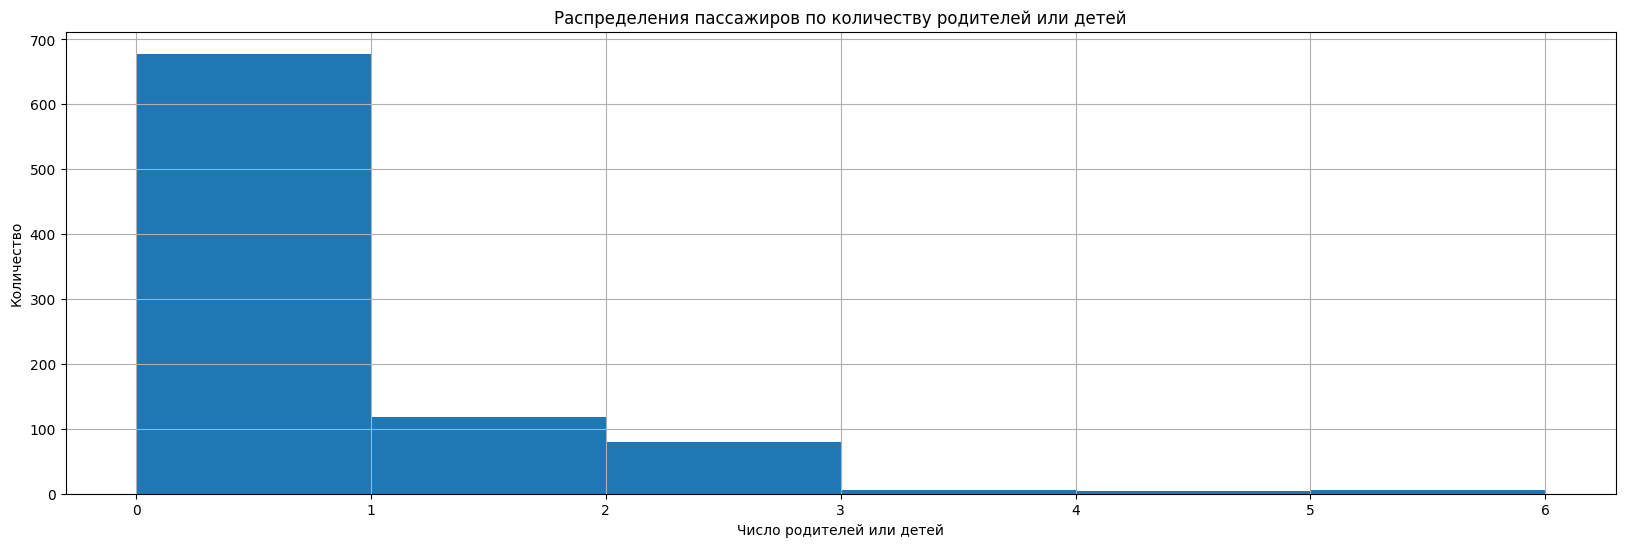

In [157]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

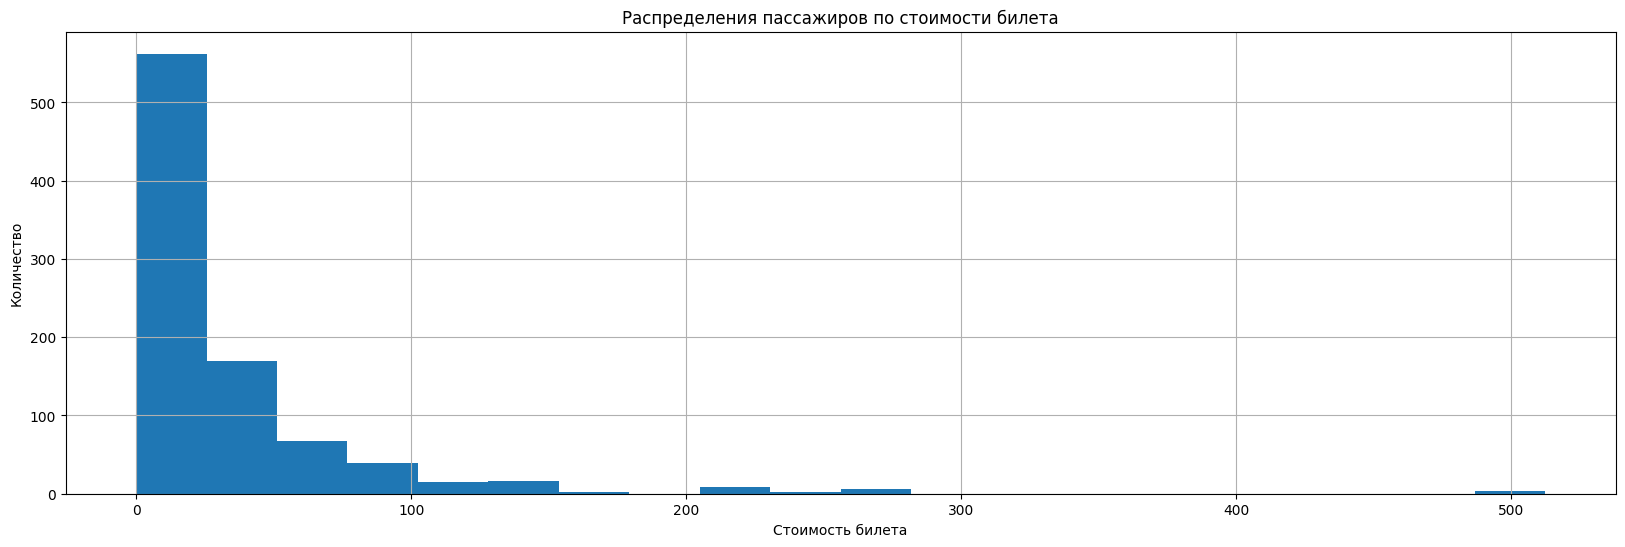

In [158]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)

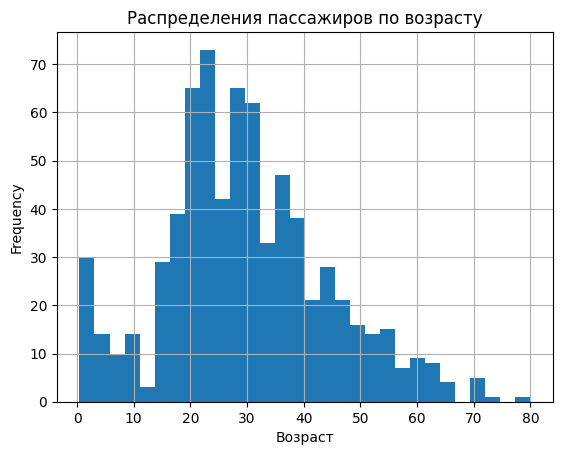

In [159]:
training_set['Age'].plot.hist(bins=30)
plt.title('Распределения пассажиров по возрасту')
plt.xlabel('Возраст')
plt.grid()
plt.show()

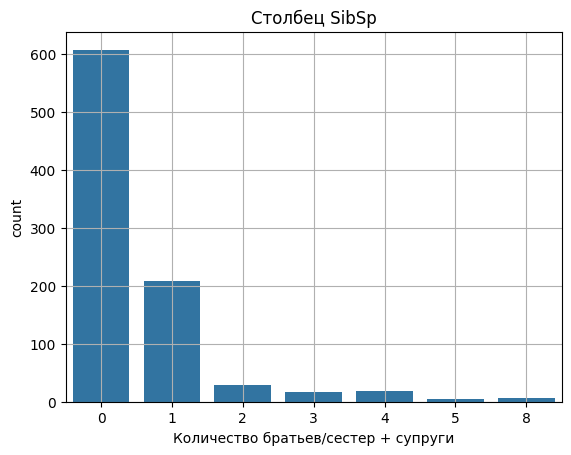

In [160]:
sns.countplot(x='SibSp', data=training_set)
plt.title('Столбец SibSp')
plt.xlabel('Количество братьев/сестер + супруги')
plt.grid()
plt.show()

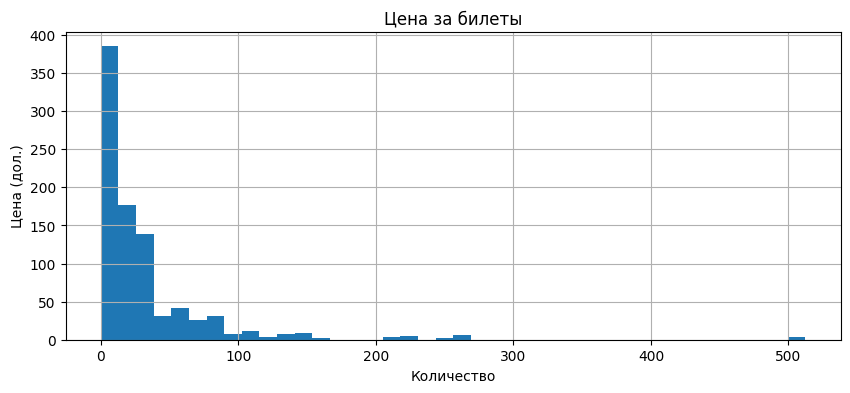

In [161]:
training_set['Fare'].hist(bins=40, figsize=(10,4))
plt.title('Цена за билеты')
plt.xlabel('Количество')
plt.ylabel('Цена (дол.)')
plt.grid(True)
plt.show()

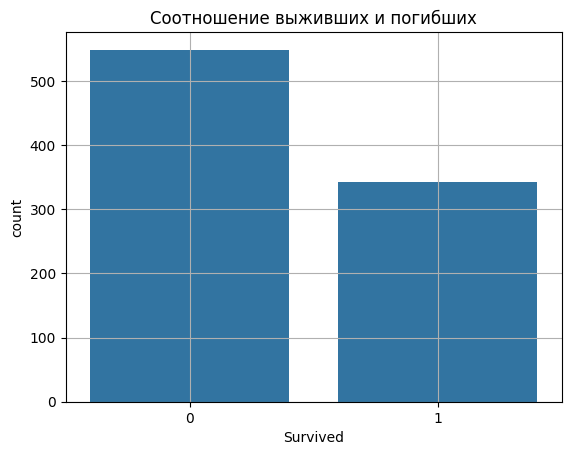

In [162]:
sns.countplot(x='Survived', data=training_set)
plt.title('Соотношение выживших и погибших')
plt.grid()
plt.show()

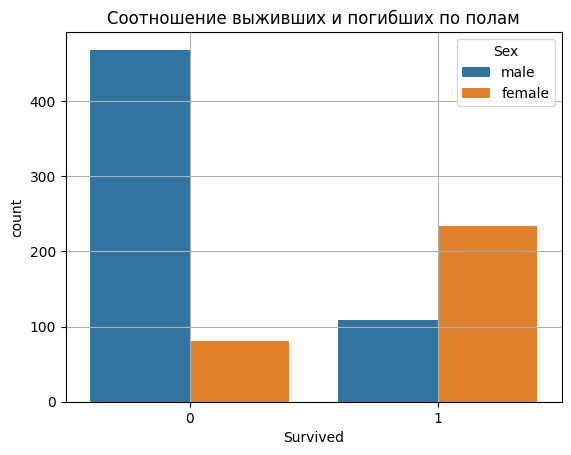

In [163]:
sns.countplot(x='Survived', data=training_set, hue='Sex')
plt.title('Соотношение выживших и погибших по полам')
plt.grid()
plt.show()

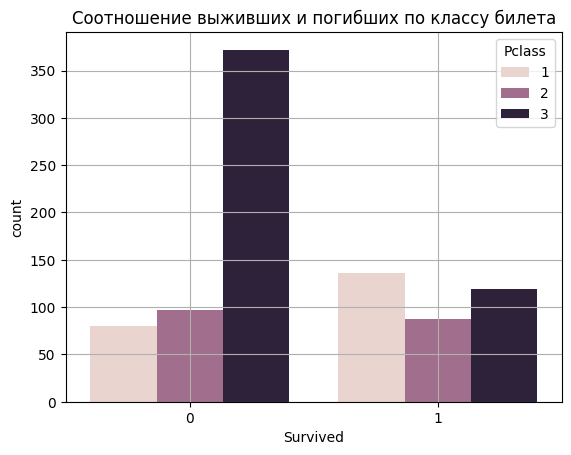

In [164]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')
plt.title('Соотношение выживших и погибших по классу билета')
plt.grid()
plt.show()

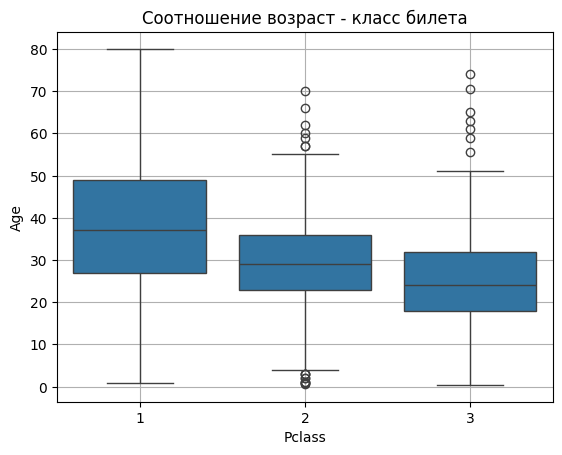

In [165]:
sns.boxplot(x='Pclass', y='Age', data=training_set)
plt.title('Соотношение возраст - класс билета')
plt.grid()
plt.show()

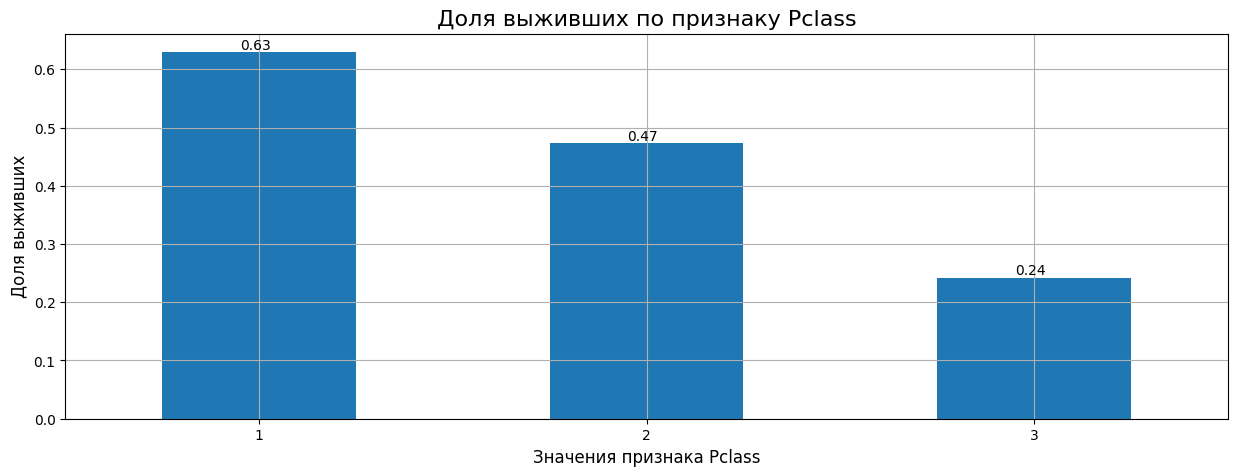

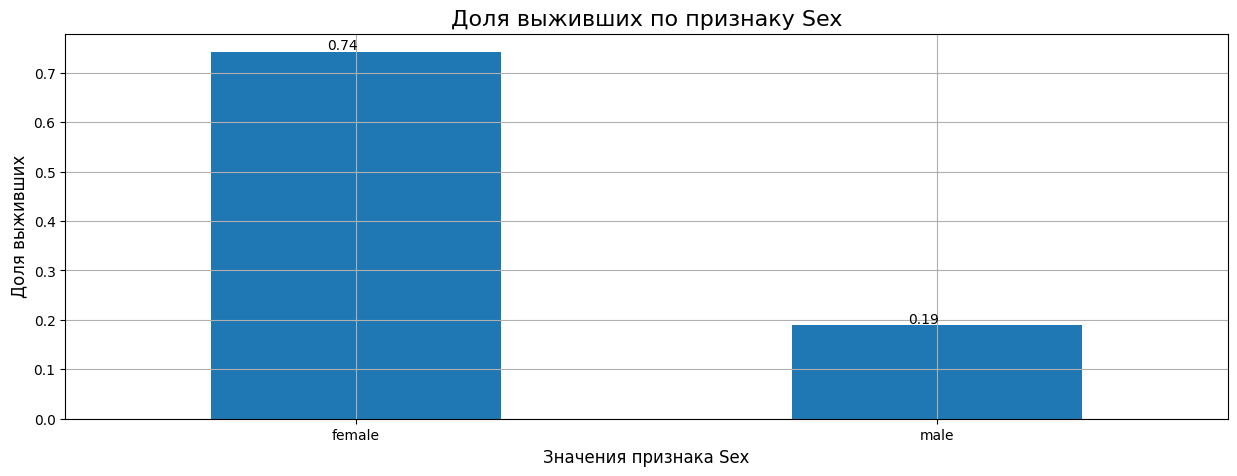

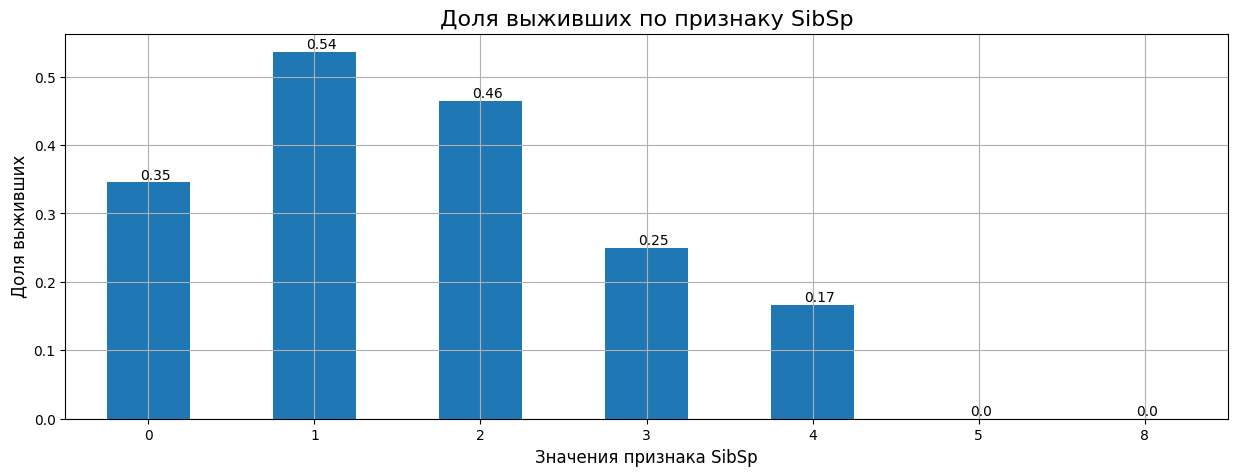

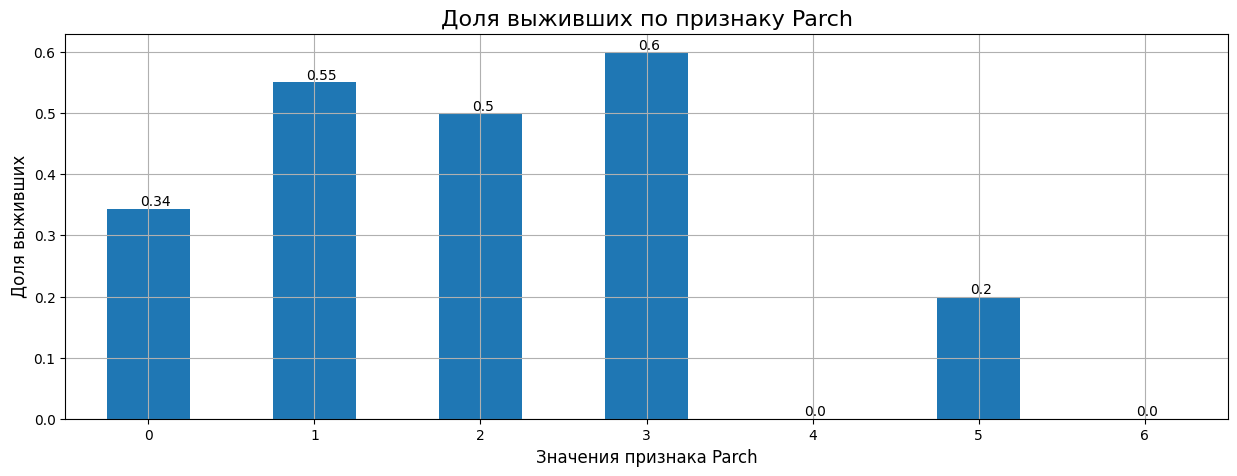

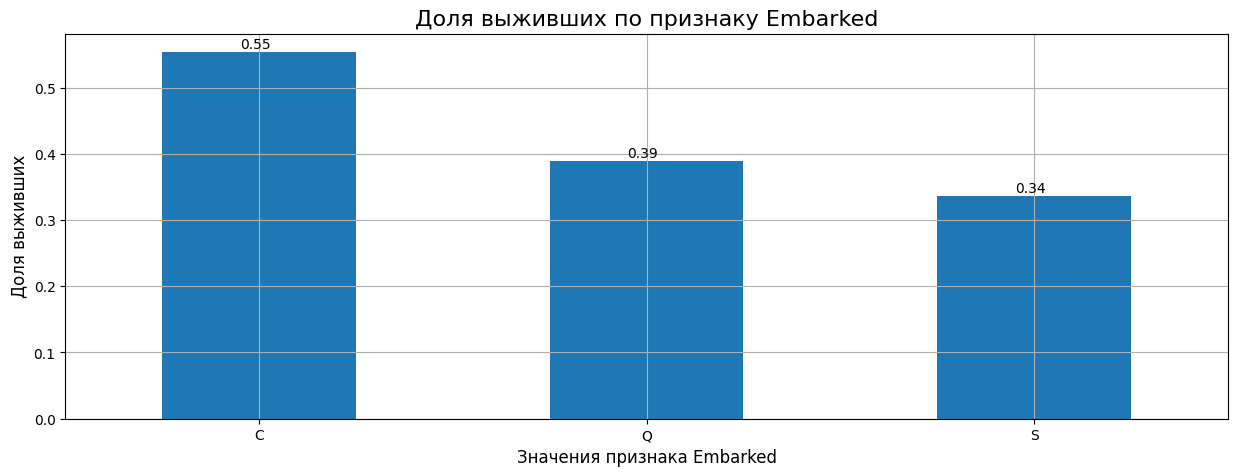

In [166]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [167]:
training_set.info()
training_set.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

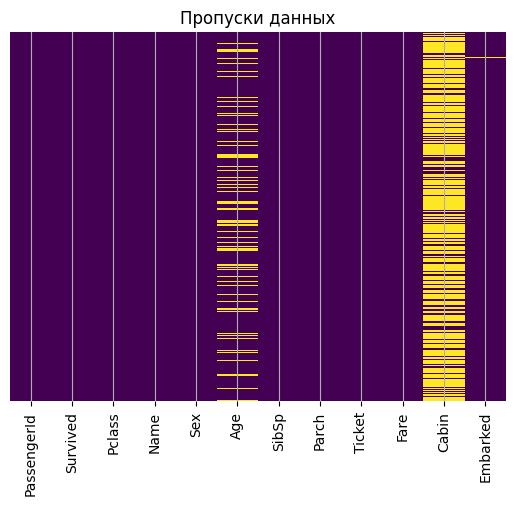

In [168]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Пропуски данных')
plt.grid()
plt.show()

In [169]:
training_set.drop('Cabin', axis=1, inplace=True)
training_set.dropna(inplace=True)
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [170]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])
print(training_set['Sex'].unique())
print(np.unique(cat_enc_le))

['male' 'female']
[0 1]


In [171]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 
print(training_set.shape)
print(cat_enc_ohe.shape)

(712, 11)
(712, 3)


In [172]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [173]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [174]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Score: 0.7832167832167832


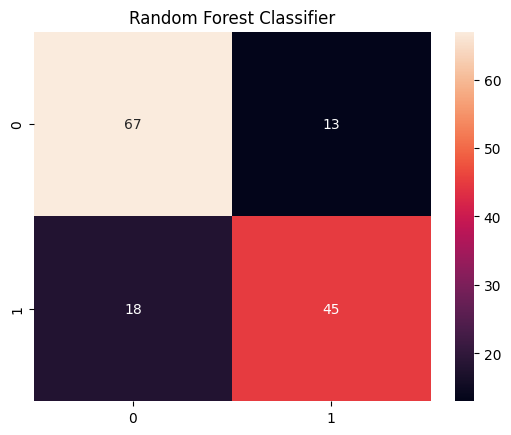

In [175]:
# 1 Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

X = training_set[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perform_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Classifier')

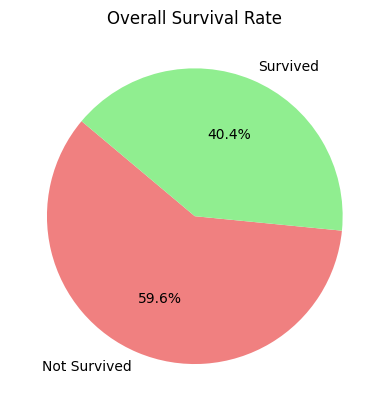

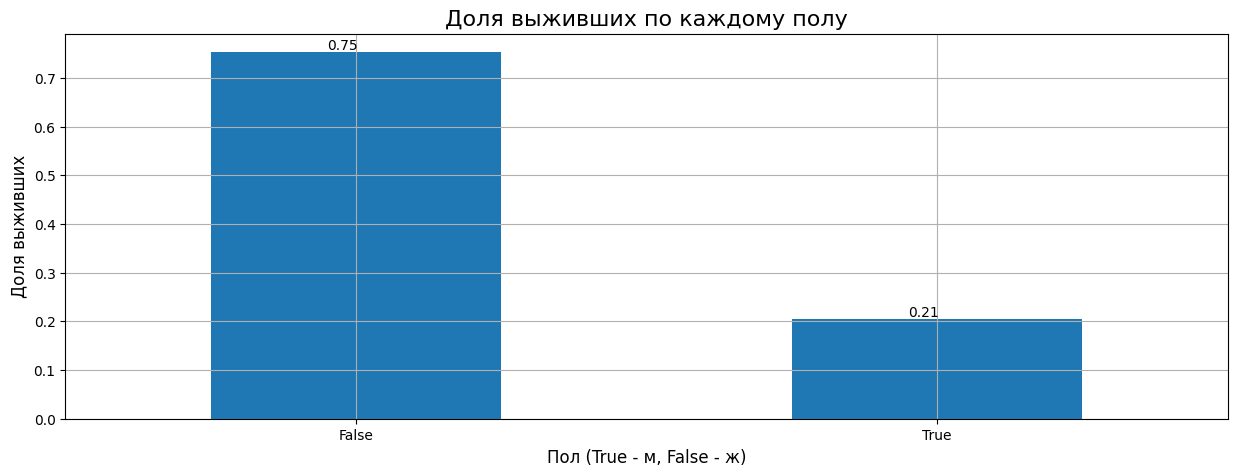

In [176]:
# 2 Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

# 3 Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?
survival_pivot = training_set.pivot_table(
    index='male', 
    values='Survived', 
    aggfunc=['mean', 'count']
)
survival_pivot.columns = ['Survival Rate', 'Count']

# Визуализация общей доли выживших (pie chart)
overall_survival = training_set.pivot_table(index='Survived', aggfunc='size')
survival_labels = ['Not Survived', 'Survived']

# Визуализация
plt.pie(
    overall_survival, 
    labels=survival_labels, 
    autopct='%1.1f%%', 
    colors=['lightcoral', 'lightgreen'], 
    startangle=140
)
plt.title('Overall Survival Rate')

column='male'
pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Доля выживших по каждому полу', fontdict={'size': 16})
ax.set_ylabel('Доля выживших', fontdict={'size': 12})
ax.set_xlabel(column, fontdict={'size': 12})

for cnt in range(pivot.shape[0]):
    value = pivot.iloc[cnt].values[0]
    ax.text(cnt - .05, value + .005, round(value, 2))
    
pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
ax.set_xlabel('Пол (True - м, False - ж)', fontdict={'size': 12})
plt.show()

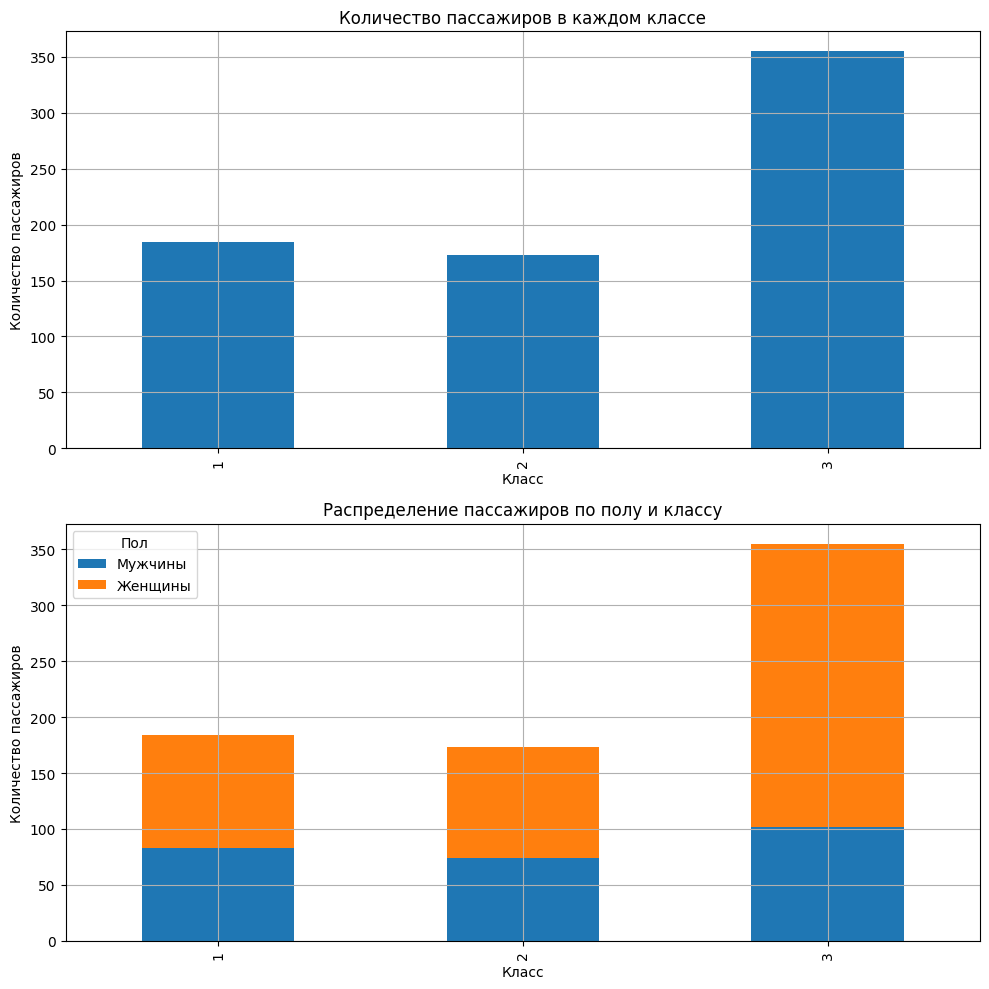

In [177]:
# 4 Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

class_counts = training_set['Pclass'].value_counts().sort_index()

class_gender_counts = training_set.groupby(['Pclass', 'male']).size().unstack()

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
class_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Количество пассажиров в каждом классе')
axs[0].set_xlabel('Класс')
axs[0].set_ylabel('Количество пассажиров')
axs[0].grid()

# График 2: Распределение пассажиров по полу и классу
class_gender_counts.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Распределение пассажиров по полу и классу')
axs[1].set_xlabel('Класс')
axs[1].set_ylabel('Количество пассажиров')
axs[1].legend(title='Пол', labels=['Мужчины', 'Женщины'])

plt.tight_layout()
plt.grid()
plt.show()

Коэффициент корреляции между возрастом и ценой билета: 0.0931


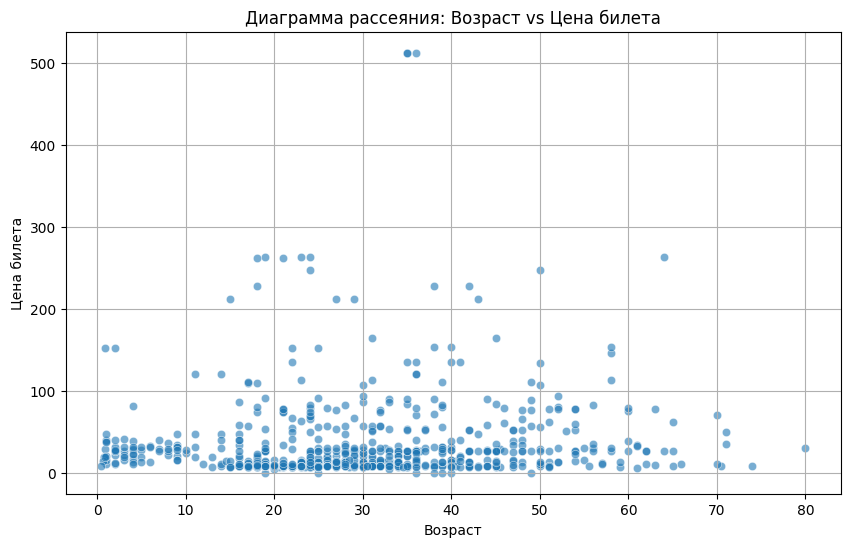

In [178]:
# 6 Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров.
# Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

correlation = training_set['Age'].corr(training_set['Fare'])
print(f"Коэффициент корреляции между возрастом и ценой билета: {correlation:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=training_set, x='Age', y='Fare', alpha=0.6)
plt.title('Диаграмма рассеяния: Возраст vs Цена билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.grid()
plt.show()

Средняя цена билета для выживших: 51.65
Средняя цена билета для невыживших: 22.97


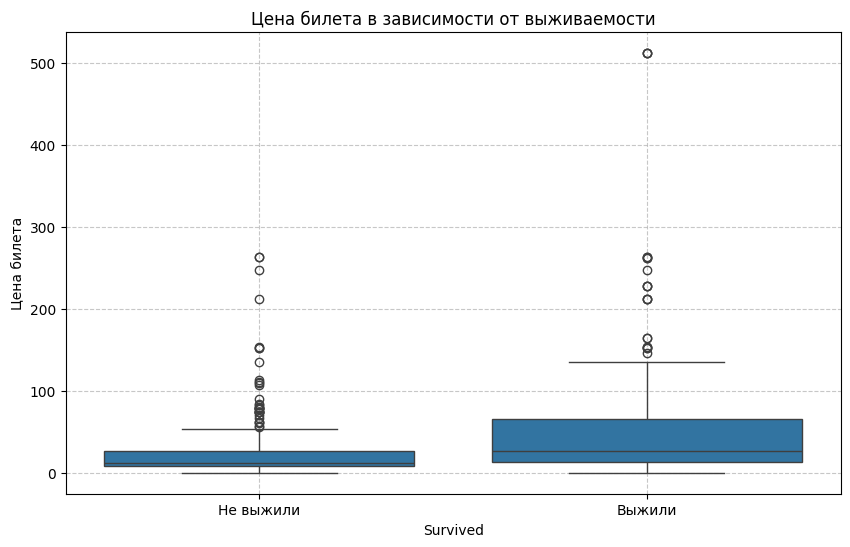

Процент выживших пассажиров по классам:
Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


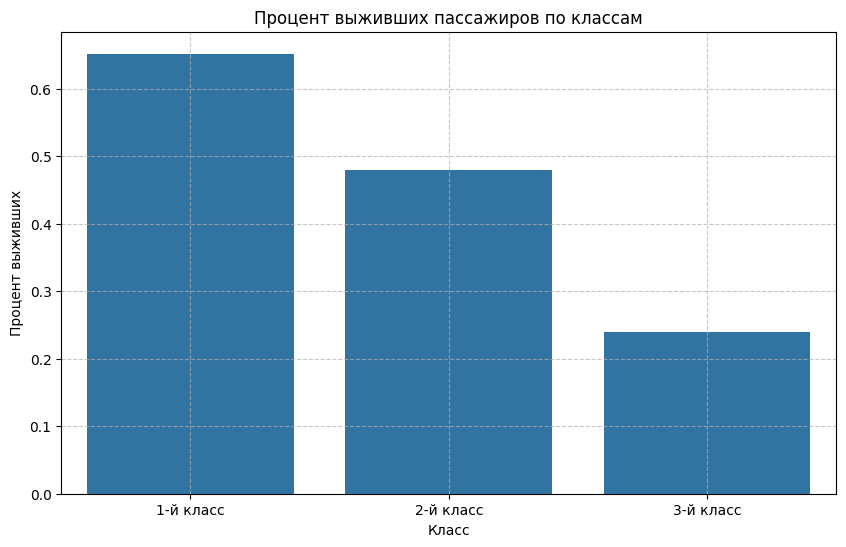

In [179]:
# 7 Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?
survival_fare_mean = training_set.groupby('Survived')['Fare'].mean()
print(f"Средняя цена билета для выживших: {survival_fare_mean[1]:.2f}")
print(f"Средняя цена билета для невыживших: {survival_fare_mean[0]:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=training_set, x='Survived', y='Fare')
plt.title('Цена билета в зависимости от выживаемости')
plt.ylabel('Цена билета')
plt.xticks([0, 1], ['Не выжили', 'Выжили'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

class_survival_rate = training_set.groupby('Pclass')['Survived'].mean()
print(f"Процент выживших пассажиров по классам:\n{class_survival_rate}")

plt.figure(figsize=(10, 6))
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values)
plt.title('Процент выживших пассажиров по классам')
plt.xlabel('Класс')
plt.ylabel('Процент выживших')
plt.xticks([0, 1, 2], ['1-й класс', '2-й класс', '3-й класс'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Минимальная, средняя и максимальная стоимость билетов по портам отправления:
                min       mean       max
embark_town                             
C            4.0125  68.296767  512.3292
Q            6.7500  18.265775   90.0000
S            0.0000  27.476284  263.0000

Минимальная, средняя и максимальная стоимость билетов для пассажиров, севших в Саутгемптоне:
min       0.000000
mean     27.476284
max     263.000000
Name: Fare, dtype: float64


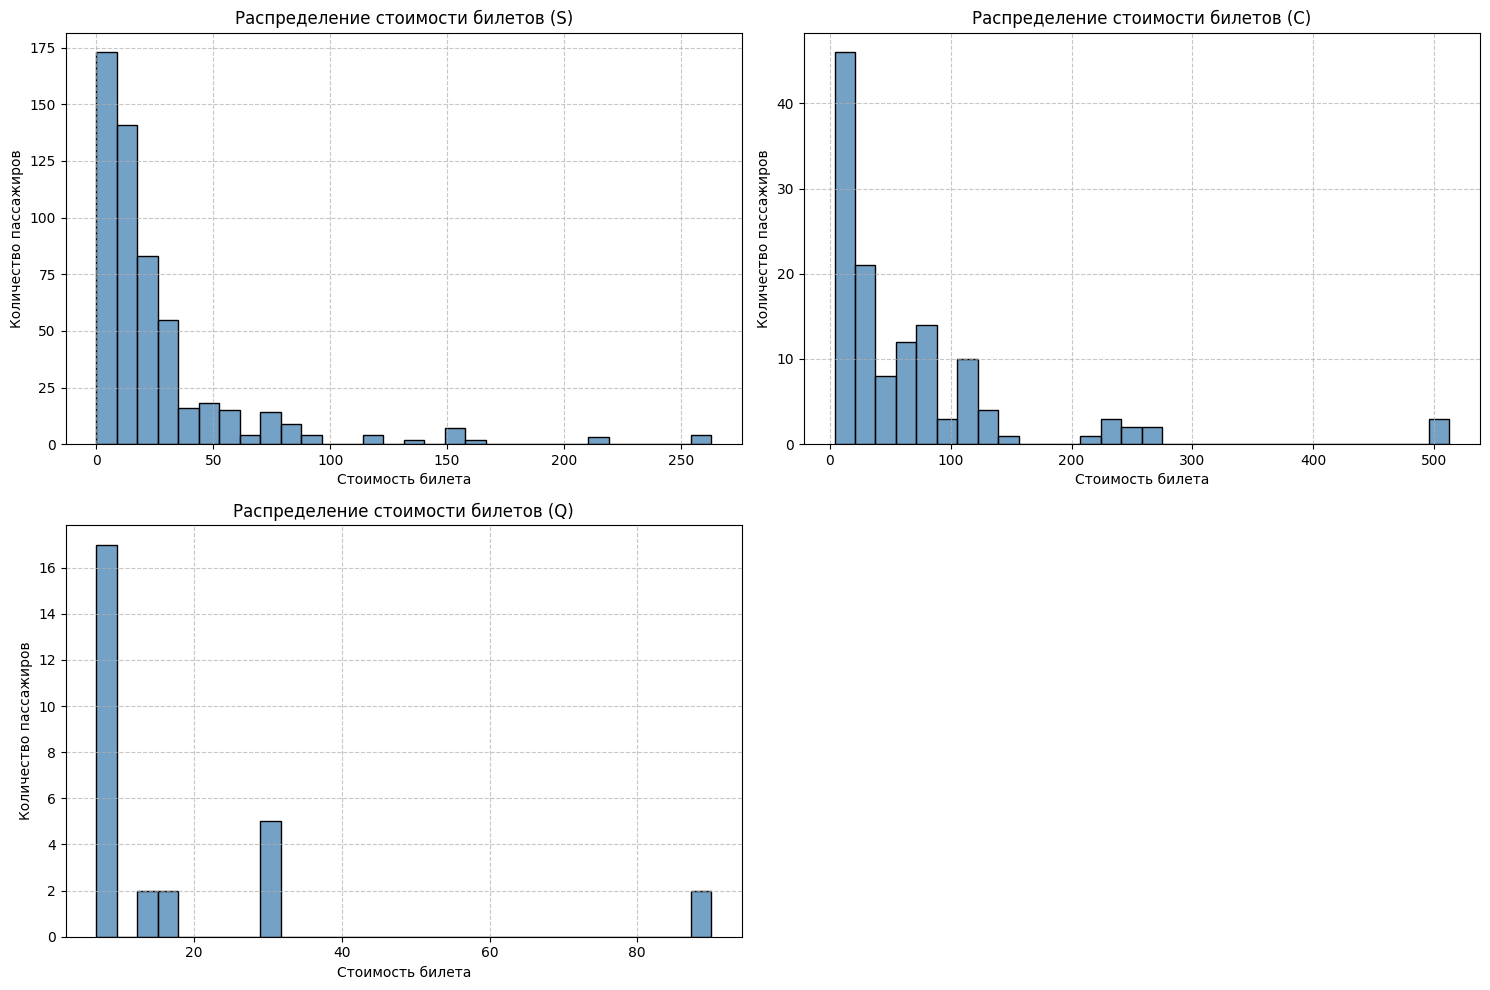

In [180]:
# 8 Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму,
# которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на
# корабль в Саутгемптоне.

training_set_cleaned = training_set[['Fare', 'Q', 'S']].dropna()

training_set_cleaned['embark_town'] = 'C'  # По умолчанию считаем, что порт — Cherbourg
training_set_cleaned.loc[training_set_cleaned['Q'], 'embark_town'] = 'Q'  # Порт Queenstown
training_set_cleaned.loc[training_set_cleaned['S'], 'embark_town'] = 'S'  # Порт Southampton

fare_stats_by_port = training_set_cleaned.groupby('embark_town')['Fare'].agg(['min', 'mean', 'max'])
print("Минимальная, средняя и максимальная стоимость билетов по портам отправления:")
print(fare_stats_by_port)

southampton_fares = training_set_cleaned[training_set_cleaned['embark_town'] == 'S']['Fare']
southampton_stats = southampton_fares.agg(['min', 'mean', 'max'])
print("\nМинимальная, средняя и максимальная стоимость билетов для пассажиров, севших в Саутгемптоне:")
print(southampton_stats)

ports = training_set_cleaned['embark_town'].unique()
plt.figure(figsize=(15, 10))

for i, port in enumerate(ports):
    plt.subplot(2, 2, i + 1)  # Делаем сетку 2x2
    port_data = training_set_cleaned[training_set_cleaned['embark_town'] == port]
    sns.histplot(port_data['Fare'], bins=30, kde=False, color='steelblue')
    plt.title(f'Распределение стоимости билетов ({port})')
    plt.xlabel('Стоимость билета')
    plt.ylabel('Количество пассажиров')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [181]:
# 10 Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило?
# Какую долю составляет представленный набор данных от всей генеральной совокупности?

total_passengers = 887  # Общее количество пассажиров на Титанике

survived_count = training_set['Survived'].sum()

sample_size = len(training_set)
sample_fraction = sample_size / total_passengers

print(f"Общее количество пассажиров на Титанике: {total_passengers}")
print(f"Количество выживших пассажиров: {survived_count}")
print(f"Доля представленной выборки от всей генеральной совокупности: {sample_fraction:.2f}")

print(f"Общее количество пассажиров в наборе данных: {sample_size}")

Общее количество пассажиров на Титанике: 887
Количество выживших пассажиров: 288
Доля представленной выборки от всей генеральной совокупности: 0.80
Общее количество пассажиров в наборе данных: 712


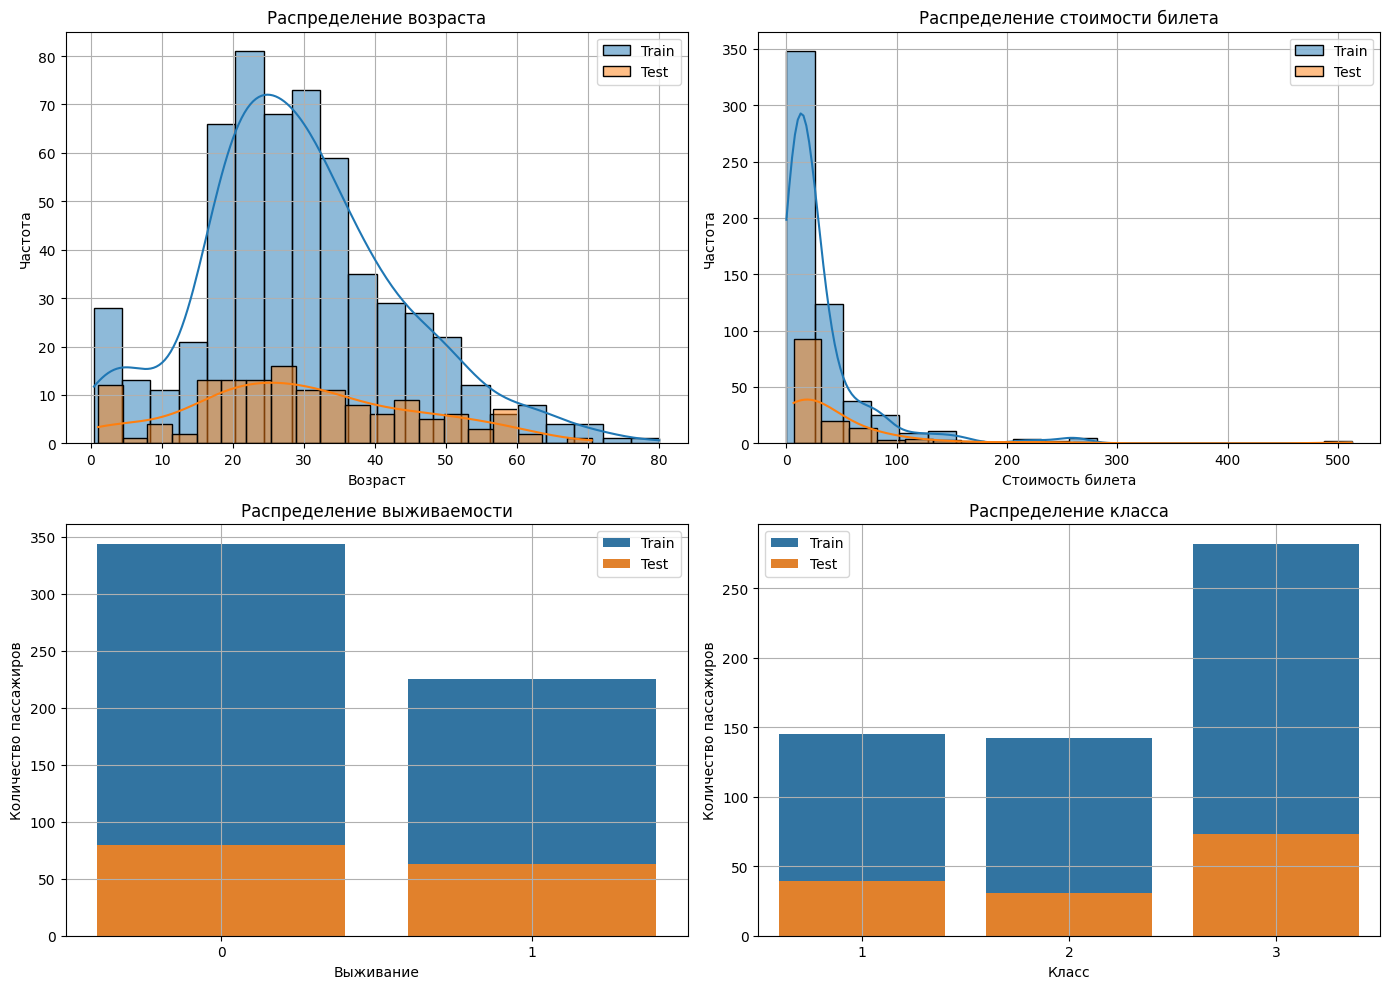

In [182]:
# 11 Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых
# атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

X = training_set[['Age', 'Fare', 'Pclass']]
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(X_train['Age'], kde=True, label='Train', ax=axs[0, 0], bins=20)
sns.histplot(X_test['Age'], kde=True, label='Test', ax=axs[0, 0], bins=20)
axs[0, 0].set_title('Распределение возраста')
axs[0, 0].set_xlabel('Возраст')
axs[0, 0].set_ylabel('Частота')
axs[0, 0].grid()
axs[0, 0].legend()

sns.histplot(X_train['Fare'], kde=True, label='Train', ax=axs[0, 1], bins=20)
sns.histplot(X_test['Fare'], kde=True, label='Test', ax=axs[0, 1], bins=20)
axs[0, 1].set_title('Распределение стоимости билета')
axs[0, 1].set_xlabel('Стоимость билета')
axs[0, 1].set_ylabel('Частота')
axs[0, 1].grid()
axs[0, 1].legend()

sns.countplot(x=y_train, ax=axs[1, 0], label='Train')
sns.countplot(x=y_test, ax=axs[1, 0], label='Test')
axs[1, 0].set_title('Распределение выживаемости')
axs[1, 0].set_xlabel('Выживание')
axs[1, 0].set_ylabel('Количество пассажиров')
axs[1, 0].grid()
axs[1, 0].legend()

sns.countplot(x=X_train['Pclass'], ax=axs[1, 1], label='Train')
sns.countplot(x=X_test['Pclass'],  ax=axs[1, 1], label='Test')
axs[1, 1].set_title('Распределение класса')
axs[1, 1].set_xlabel('Класс')
axs[1, 1].set_ylabel('Количество пассажиров')
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [183]:
# 12 Сбалансируйте классы в исходном датасете двумя способами:
# 13 Удалите лишние объекты мажоритарного класса (выбранные случайно)

training_set_balanced_1 = training_set.copy()

majority_class = training_set_balanced_1['Survived'].value_counts().idxmax()
majority_class_df = training_set_balanced_1[training_set_balanced_1['Survived'] == majority_class]
majority_class_indices = majority_class_df.index
majority_class_count = len(majority_class_indices)

to_remove = majority_class_count - (len(training_set_balanced_1) - majority_class_count)

remove_indices = majority_class_df.sample(to_remove).index
training_set_balanced_1.drop(remove_indices, inplace=True)

training_set_balanced_1['Survived'].value_counts()

Survived
1    288
0    288
Name: count, dtype: int64

In [184]:
# 14 Добавьте в выборку дубликаты миноритарного класса

training_set_balanced_2 = training_set.copy()

majority_class = training_set_balanced_2[training_set_balanced_2["Survived"] == 0]
minority_class = training_set_balanced_2[training_set_balanced_2["Survived"] == 1]

minority_upsampled = resample(
    minority_class,
    replace=True,  # Разрешить дублирование
    n_samples=len(majority_class)
)

training_set_balanced_2 = pd.concat([majority_class, minority_upsampled])
training_set_balanced_2['Survived'].value_counts()

Survived
0    424
1    424
Name: count, dtype: int64

Score: 0.7692307692307693


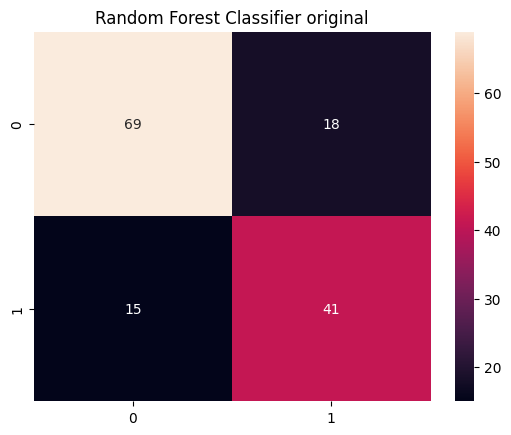

In [185]:
# 15 Проведите исследование эффективности простой модели классификации до и после данных преобразований.
X = training_set[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
perform_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Classifier original')

Score: 0.8017241379310345


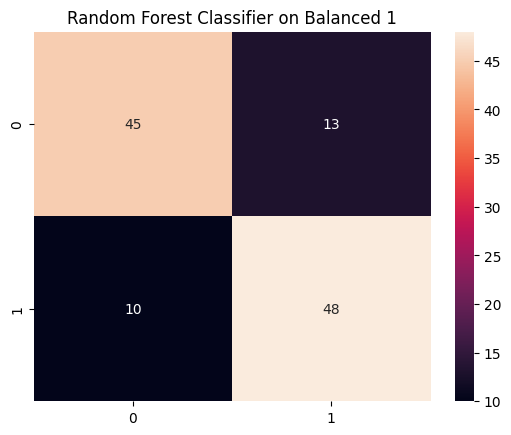

In [186]:
X = training_set_balanced_1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set_balanced_1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
perform_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Classifier on Balanced 1')

Score: 0.8235294117647058


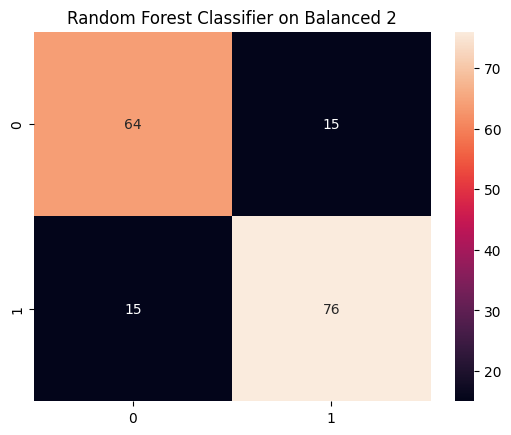

In [187]:
X = training_set_balanced_2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set_balanced_2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
perform_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test, 'Random Forest Classifier on Balanced 2')

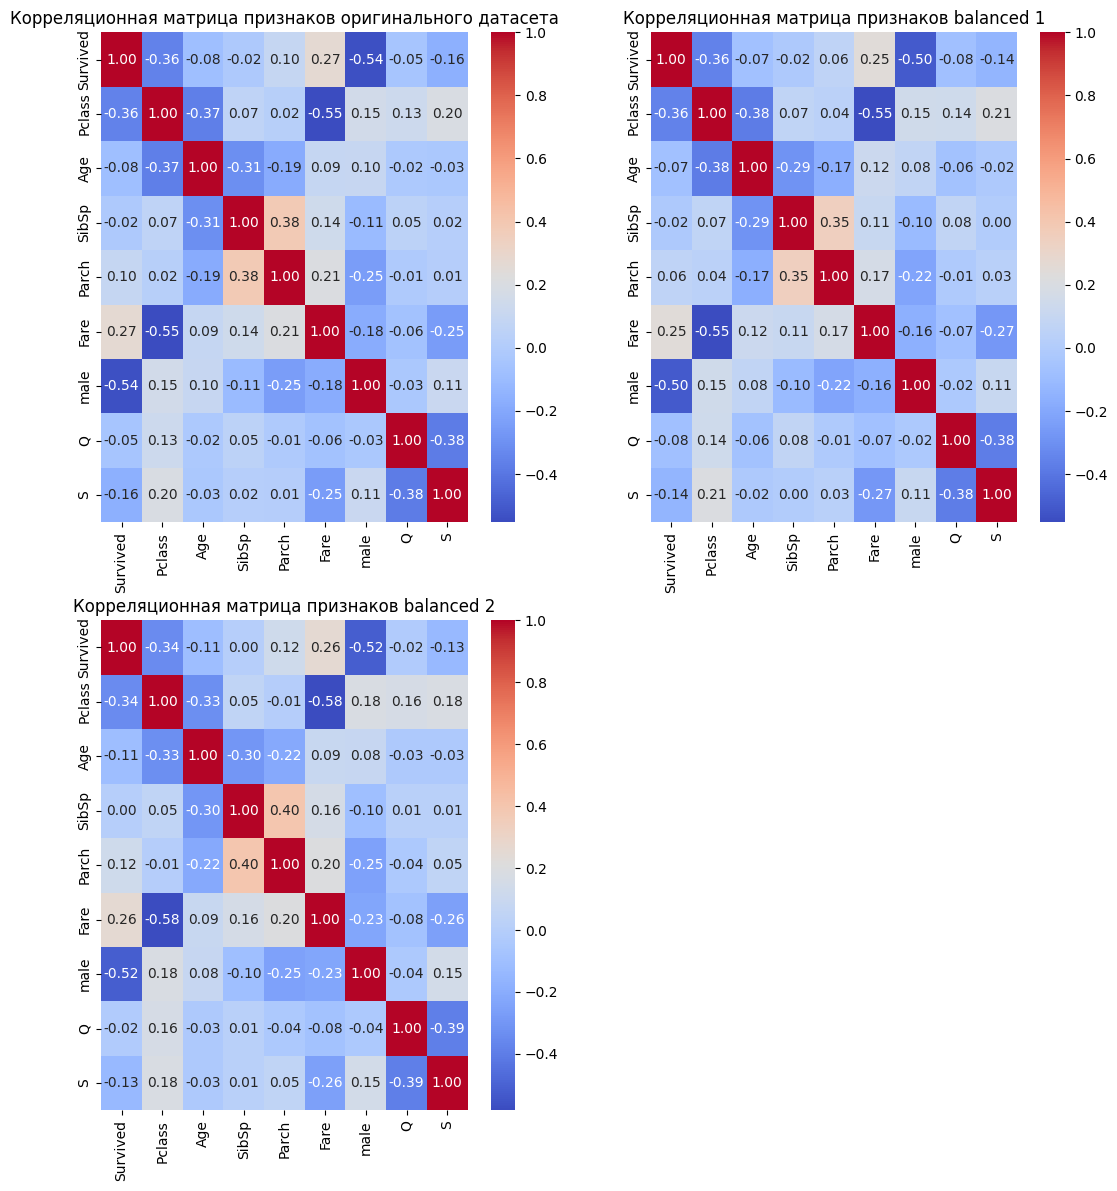

In [188]:
plt.figure(figsize=(13, 14))
plt.subplot(2, 2, 1)
sns.heatmap(training_set.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков оригинального датасета")

plt.subplot(2, 2, 2)
sns.heatmap(training_set_balanced_1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков balanced 1")

plt.subplot(2, 2, 3)
sns.heatmap(training_set_balanced_2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков balanced 2")

plt.show()

Анализ выживаемости по возрастным категориям:
   AgeCategory  SurvivalRate
0            0      0.539823
1            1      0.385017
2            2      0.240000


Text(0.5, 1.0, 'Корреляционная матрица признаков оригинального датасета')

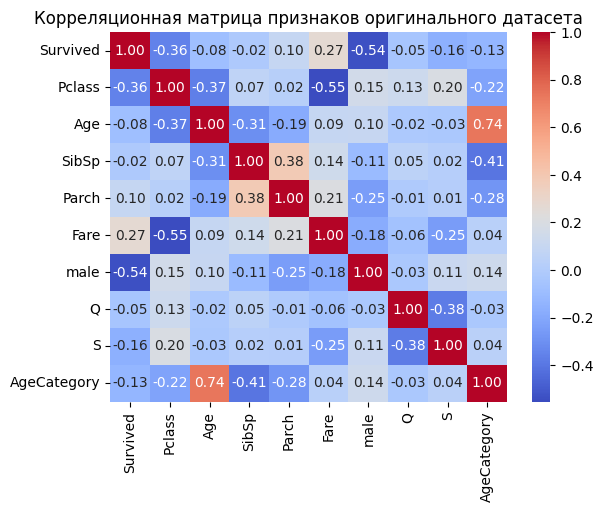

In [ ]:
# 17 Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут
# "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

def categorize_age(age):
    if age < 18:
        return 0 # ребенок
    elif age < 60:
        return 1 # взрослый
    else:
        return 2 # старик

training_set["AgeCategory"] = training_set["Age"].apply(categorize_age)

survival_analysis = training_set.groupby("AgeCategory")["Survived"].mean().reset_index()
survival_analysis.rename(columns={"Survived": "SurvivalRate"}, inplace=True)

print("Анализ выживаемости по возрастным категориям:")
print(survival_analysis)

sns.heatmap(training_set.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков оригинального датасета")